<a href="https://colab.research.google.com/github/vinayshanbhag/math/blob/master/Discrete_Cosine_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
from scipy.fftpack import fft, dct, idct
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

def create_animation_data(samples:int=8, iterations:int=100, **kwargs):
  """ create data for animated plots
      samples: # of discrete samples from the signal 
      iterations: each iteration corresponds to
                  the data for one frame in the animated plot 
      offset: (min,max) of the range of offsets to apply to the signal
      scalar: (min,max) of the scalar applied to the signal
      freq:   (min,max) of the frequency multiplier applied to the signal

      The values for offset/scalar/freq applied to each frame are evenly spaced
      real values in the specified (min, max) range
  """
  offset_range = kwargs.get('offset',None)
  scalar_range = kwargs.get('scalar',None)
  freq_range = kwargs.get('freq',None)
  title = ""

  if offset_range!=None:
    offsets = np.append(np.linspace(offset_range[0],offset_range[1],iterations//2),np.linspace(offset_range[1],offset_range[0],iterations//2))
    title="Effect of adding an offset"
  else:
    offsets = np.zeros(iterations)
  
  if scalar_range!=None:
    scalars = np.append(np.linspace(scalar_range[0],scalar_range[1],iterations//2),np.linspace(scalar_range[1],scalar_range[0],iterations//2))
    title="Effect of scaling"
  else:
    scalars=np.ones(iterations)
  
  if freq_range!=None:
    freqs = np.append(np.linspace(freq_range[0],freq_range[1],iterations//2),np.linspace(freq_range[1],freq_range[0],iterations//2))
    title="Effect of changing frequency"
  else:
    freqs=np.ones(iterations)

  data = []
  for i in range(iterations):
    k = np.linspace(0,np.pi, samples)
    y = offsets[i]+scalars[i]*np.cos(freqs[i]*k)
    x = np.linspace(0, samples-1, samples)
    yc = offsets[i]+scalars[i]*np.cos(freqs[i]*np.linspace(0,np.pi, samples*10))
    xc = np.linspace(0,samples-1,samples*10)
    x1 = x
    y1 = dct(y, norm='ortho')
    xinv = x
    yinv = idct(y1, norm='ortho')
    data.append({'x':x,'y':y,'xc':xc, 'yc':yc,'x1':x,'y1':y1,'xinv':xinv,'yinv':yinv,'title':title})
  return data

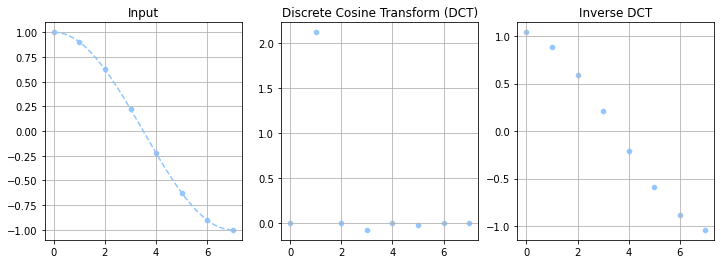

In [115]:
n = 8
k = np.linspace(0,2*np.pi, n)
y = np.cos(0.5*k)
x = np.linspace(0, len(y)-1, len(y))
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].grid(True)
ax[0].set_title('Input')
ax[1].grid(True)
ax[1].set_title('Discrete Cosine Transform (DCT)')
ax[2].grid(True)
ax[2].set_title('Inverse DCT')
sns.scatterplot(x=x,y=y, ax=ax[0]);
yc = np.cos(0.5*np.linspace(0,2*np.pi, n*10))
xc = np.linspace(0, len(y)-1, len(yc))
sns.lineplot(x=xc,y=yc, ax= ax[0], linestyle='--');

y1 = dct(y, norm='ortho')
x = np.linspace(0, len(y1)-1, len(y1))
sns.scatterplot(x=x,y=y1, ax=ax[1]);

y2 = np.array([0 if np.abs(i)<1e-1 else i for i in y1])
yinv = idct(y2, norm='ortho')
x = np.linspace(0, len(yinv)-1, len(yinv))
sns.scatterplot(x=x,y=yinv)


In [203]:
iter_data = create_animation_data(scalar=(-1,1)) + create_animation_data(offset=(-1,1)) + create_animation_data(freq=(0,8))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
get_range = lambda x, a: (min([min(d[a]) for d in x]),max([max(d[a]) for d in x]) )
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(3,1, figsize=(6,9));
fig.suptitle("Effect of higher frequencies")
fig.tight_layout()


im = ax[0].imshow(np.repeat(np.array([iter_data[1]['y']]),1, axis=0), cmap='gray')
ax[0].set_xlim(get_range(iter_data,'x'))
ax[0].get_xaxis().set_visible(True)
ax[0].get_yaxis().set_visible(False)
#ax[0].axis('off');
ax[0].set_title('Pixels')

ax[1].grid(True)
ax[1].set_title('Input')
ax[2].grid(True)
ax[2].set_title('Discrete Cosine Transform')



ax[1].set_xlim(get_range(iter_data,'x'))
ax[1].get_xaxis().set_visible(False)
ax[1].grid(True)
ax[1].set_ylim(get_range(iter_data,'y'))
ax[2].set_xlim(get_range(iter_data,'x'))
ax[2].set_ylim(get_range(iter_data,'y1'))
line0, = ax[1].plot([], [], linestyle='dotted');#continuous signal
scat0 = ax[1].scatter([], []); #sample points
scat = ax[2].scatter([],[], color='green');


def animate(i):
    # Discrete samples
    x = iter_data[i]['x']
    y = iter_data[i]['y']

    # points to plot continuous signal correspnding to the samples
    yc = iter_data[i]['yc']
    xc = iter_data[i]['xc']
    
    #DCT coeff
    x1 = iter_data[i]['x1']
    y1 = iter_data[i]['y1'] 

    #plot
    line0.set_data(xc, yc)
    scat0.set_offsets([[b[0],b[1]] for b in zip(x,y)])
    scat.set_offsets([[b[0],b[1]] for b in zip(x,y1)])
    fig.suptitle(iter_data[i]['title'])

    im.set_array(np.repeat(np.array([iter_data[i]['y']]),1, axis=0))
    return im, line0, scat0, scat

anim = FuncAnimation(fig, animate, frames=len(iter_data), interval=100, blit=True);


In [208]:
display(HTML(anim.to_html5_video()))

In [157]:
def dct2d(x):
    return dct(dct(x, axis=0, norm='ortho'), axis=1, norm='ortho' )

def idct2d(x):
    return idct(idct(x, axis=0 , norm='ortho'), axis=1 , norm='ortho')

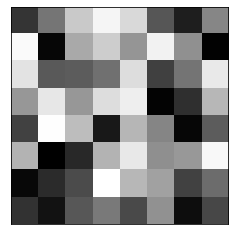

In [214]:
w,h=8,8
x = np.random.rand(w*h).reshape(w,h)
plt.imshow(x, cmap='gray')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

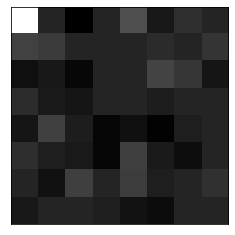

In [222]:
y = dct2d(x)
y = np.array([i if np.abs(i)>1e-1 else 0 for i in y.reshape(w*h)]).reshape(w,h)
plt.imshow(y, cmap='gray')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

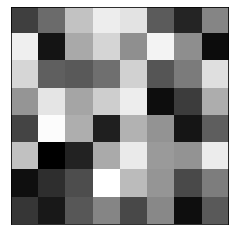

In [224]:
z = idct2d(y)
plt.imshow(z, cmap='gray')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)